In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("E:\\creditcard\\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
del df["Time"]

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 30)

In [8]:
# Explore the features available in your dataframe
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

In [9]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [15]:
fraud_tran=df.loc[df['Class']==0,'Amount']

In [16]:
fraud_tran

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
5           3.67
6           4.99
7          40.80
8          93.20
9           3.68
10          7.80
11          9.99
12        121.50
13         27.50
14         58.80
15         15.99
16         12.99
17          0.89
18         46.80
19          5.00
20        231.71
21         34.09
22          2.28
23         22.75
24          0.89
25         26.43
26         41.88
27         16.00
28         33.00
29         12.99
           ...  
284777      1.00
284778     80.00
284779     25.00
284780     30.00
284781     13.00
284782     12.82
284783     11.46
284784     40.00
284785      1.79
284786      8.95
284787      9.99
284788      3.99
284789     60.50
284790      9.81
284791     20.32
284792      3.99
284793      4.99
284794      0.89
284795      9.87
284796     60.00
284797      5.49
284798     24.05
284799     79.99
284800      2.68
284801      2.69
284802      0.77
284803     24.79
284804     67.

In [17]:
X=df.drop(['Class'],axis=1)
y=df.Class

# Oversampling in Python


In [21]:
from imblearn.over_sampling import RandomOverSampler


In [23]:
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_sample(X, y)


In [24]:
len(X_resampled)

568630

In [26]:
len(y_resampled)

568630

# When to use resampling methods
Use resampling methods on your training set, never on your test set!

In [47]:
from imblearn.over_sampling import SMOTE
# Define resampling method and split into train and test
method = SMOTE(kind='borderline1',ratio='minority')
X_train, X_test, y_train, y_test = train_test_split(X, y,
 train_size=0.8, random_state=0)
# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)


E:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
from sklearn.linear_model import  LogisticRegression
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
# Get your performance metrics
predicted = model.predict(X_test)
print (classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.21      0.89      0.34       101

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.60      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [49]:
print(conf_mat)

[[56518   343]
 [   11    90]]


# traditionally fraud analyst use rule based system to detect frauds

# Drawbacks of using rules based systems
Rules based systems have their limitations:

# Why use machine learning for fraud detection?


# Exploring the traditional way to catch fraud
In this exercise you're going to try finding fraud cases in our credit card dataset the "old way". First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.

In [36]:
# Run a groupby command on our labels and obtain the mean for each feature
df.groupby('Class').mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [37]:
# Implement a rule for stating which cases are flagged as fraud

df['flag_as_fraud']=np.where(np.logical_and(df['V1'] < -3,df['V3'] < -5),1,0)

In [38]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


# Logistic regression combined with SMOTE
In this exercise, you're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method. We'll show you how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, you need to define the pipeline that you're going to use.

In [39]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 


In [40]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()


In [41]:
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [42]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [43]:
# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.86      0.28       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.92      0.64     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84657   639]
 [   21   126]]


# Natural hit rate
In this exercise, you'll again use credit card transaction data. The features and labels are similar to the data in the previous chapter, and the data is heavily imbalanced. We've given you features X and labels y to work with already, which are both numpy arrays.

First you need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, you'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve in the upcoming exercises.

In [50]:
# Count the total number of observations from the length of y
total_obs = len(y)

In [51]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]

In [53]:
len(non_fraud)

284315

In [54]:
count_non_fraud = non_fraud.count(0)

In [55]:
# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100


In [56]:
# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


# Random Forest Classifier - part 1
Let's now create a first random forest classifier for fraud detection. Hopefully you can do better than the baseline accuracy you've just calculated, which was roughly 99%. This model will serve as the "baseline" model that you're going to try to improve in the upcoming exercises. Let's start first with splitting the data into a test and training set, and defining the Random Forest model. The data available are features X and labels y.

In [57]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [58]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

E:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
from sklearn.metrics import accuracy_score
# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9994382219725431


# Performance metrics for the RF model
In the previous exercises you obtained an accuracy score for your random forest model. This time, we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly. So let's get these performance metrics.

In [63]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

In [64]:
# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9316703210077877
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.71      0.81       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     5]
 [   43   104]]


# Plotting the Precision Recall Curve
You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [67]:
from sklearn.metrics import average_precision_score,precision_recall_curve

In [68]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

In [69]:
# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)


In [70]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

NameError: name 'plot_pr_curve' is not defined

Text(0.5,1,'2-class Precision-Recall curve: AP=0.68')

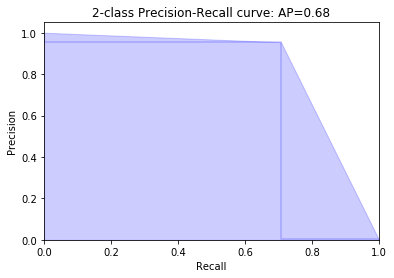

In [73]:
import matplotlib.pyplot as plt
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Correct: The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

# Model adjustments
A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In this exercise you'll explore the weight = "balanced_subsample" mode the Random Forest model from the earlier exercise. You already have split your data in a training and test set, i.e X_train, X_test, y_train, y_test are available. The metrics function have already been imported.

In [74]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

E:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9283248682140274
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.73      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85289     7]
 [   40   107]]


 You can see that the model results don't improve drastically. We now have 3 less false positives, but now 19 in stead of 18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. In the next exercises you'll see how to more smartly tweak your model to focus on reducing false negatives and catch more fraud.

# In this exercise you're going to tweak our model in a less "random" way, but use GridSearchCV to do the work for you.

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the best possible Recall score. If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.

In [75]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 'max_depth' : [4, 8]}

In [82]:
from sklearn.model_selection import  GridSearchCV

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

In [83]:
# Fit the model to our training data and obtain best parameters
grid_model.fit(X_train, y_train)


E:\ANACONDA\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\DELL\AppData\Local\Temp\joblib_memmapping_folder_9868_5231651083 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\DELL\\AppData\\Local\\Temp\\joblib_memmapping_folder_9868_5231651083\\9868-1990819998576-90dcd08243264e0ea82491956a097e1a.pkl'

In [80]:
CV_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Voting Classifier


In [84]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
ensemble_model = VotingClassifier(estimators=[('lr', clf1),
('rf', clf2), ('gnb', clf3)], voting='hard')


IndentationError: unexpected indent (<ipython-input-84-2fe988604291>, line 5)

In [ ]:
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)
 VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), 
('gnb', clf3)], voting='soft', weights=[2,1,1])